In [31]:
import ee
import tqdm
import numpy as np
import pandas as pd
import geopandas as gp

import rsfuncs as gn
import numpy as np
import pandas as pd
import geopandas as gp
import matplotlib.pyplot as plt

from tqdm import tqdm

In [2]:
ee.Authenticate()
ee.Initialize()

In [3]:
# Load some EE Image Collections
data = gn.load_data()
data_df = pd.DataFrame.from_dict(data).T.reset_index()
data_df.columns = ['product name', 'ImageCollection','Variable Name','Scaling Factor', 'spatial resolution']
data_df.tail()

,product name,ImageCollection,Variable Name,Scaling Factor,spatial resolution
53,landsat_8_b1,"ee.ImageCollection({\n ""functionInvocationVal...",B1,0.001,30
54,l8_ndwi_32d,"ee.ImageCollection({\n ""functionInvocationVal...",NDWI,1,30
55,l8_ndwi_annual,"ee.ImageCollection({\n ""functionInvocationVal...",NDWI,1,30
56,cdl,"ee.ImageCollection({\n ""functionInvocationVal...",cropland,1,30
57,nlcd,"ee.ImageCollection({\n ""functionInvocationVal...",landcover,1,30


## Plotting precipitation for a polygon on los angeles county

<AxesSubplot:>

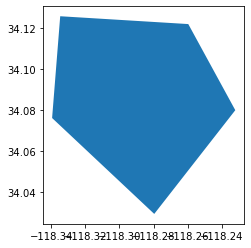

In [33]:
#read shape of los angeles county
gdf = gp.read_file("../shape/LA_KT.shp")
gdf.plot()

### Plot PRISM data

In [59]:
# specify start / end 
startdate = '2018-01-01'
enddate = '2021-12-31'

# Convert gdf to ee object
area = gn.gdf_to_ee_poly(gdf)

prism = gn.get_ims(data['prism'], startdate, enddate, area)

processing:
OREGONSTATE/PRISM/AN81m/189501


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:16<00:00,  2.97it/s]


postprocesing


  0%|                                                                                           | 0/48 [00:00<?, ?it/s]


ValueError: need at least one array to concatenate

In [ ]:
# stack the ims and calc mean
annual_mean = np.nanmean(np.dstack(prism), axis = 2)
timeseries = np.array([np.nanmean(x) for x in prism])

In [ ]:
# plot
plt.imshow(annual_mean)
plt.colorbar()
plt.axis('off')
plt.show()

In [ ]:
dates = pd.date_range(startdate,enddate, freq = "M")
plt.plot(dates, timeseries)

In [ ]:
# write 
#gn.write_raster(annual_mean,gdf,"../prism.tif")

In [49]:
data_df['product name']

0          modis_aet
1          modis_pet
2          gldas_aet
3          gldas_pet
4          nldas_pet
5             tc_aet
6             tc_pet
7           gmet_etr
8           gmet_eto
9          fldas_aet
10              trmm
11             prism
12            chirps
13          persiann
14              dmet
15               gpm
16         fldas_swe
17         gldas_swe
18          dmet_swe
19            tc_swe
20              tc_r
21         fldas_ssr
22         fldas_bfr
23         gldas_ssr
24         gldas_bfr
25         gldas_qsm
26           ecmwf_r
27             tc_sm
28              fsm1
29              fsm2
30              fsm3
31              fsm4
32        gldas_rzsm
33              gsm1
34              gsm2
35              gsm3
36              gsm4
37          smap_ssm
38         smap_susm
39          smap_smp
40          smos_ssm
41         smos_susm
42          smos_smp
43              srtm
44               jpl
45               csr
46               gfz
47           